In [2]:
import pandas as pd
import numpy as np

import scipy.stats as stats
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer


In [5]:
df = pd.read_csv('Titanic.csv',usecols=['Age','Fare','Survived'])

In [6]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [7]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

/var/folders/sr/v_bsvj7j3lgg41xztlkdg5zh0000gn/T/ipykernel_84185/694922604.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)


In [8]:
x= df.iloc[:,1:3]
y = df.iloc[:,0]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

/var/folders/sr/v_bsvj7j3lgg41xztlkdg5zh0000gn/T/ipykernel_84185/4165089196.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'])


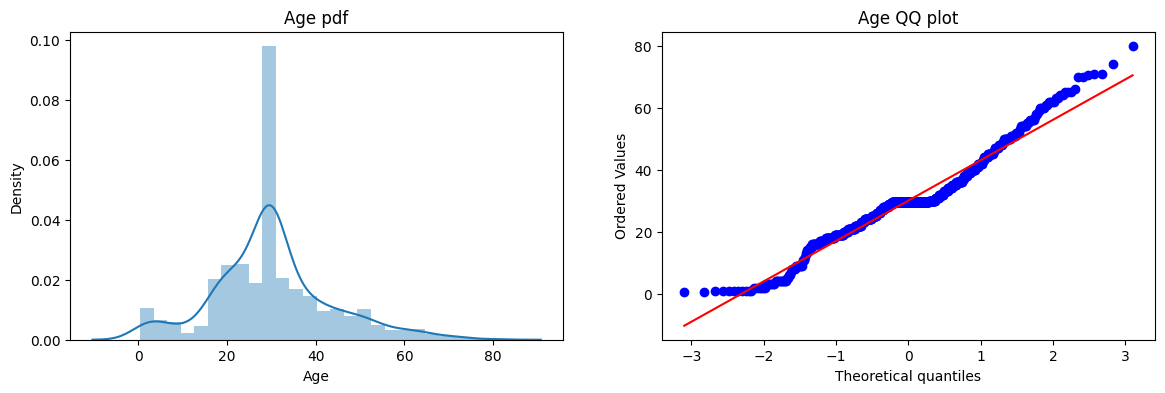

In [16]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title('Age pdf')

plt.subplot(122)
stats.probplot(X_train['Age'],dist="norm",plot=plt)
plt.title('Age QQ plot')

plt.show()

/var/folders/sr/v_bsvj7j3lgg41xztlkdg5zh0000gn/T/ipykernel_84185/3554313727.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Fare'])


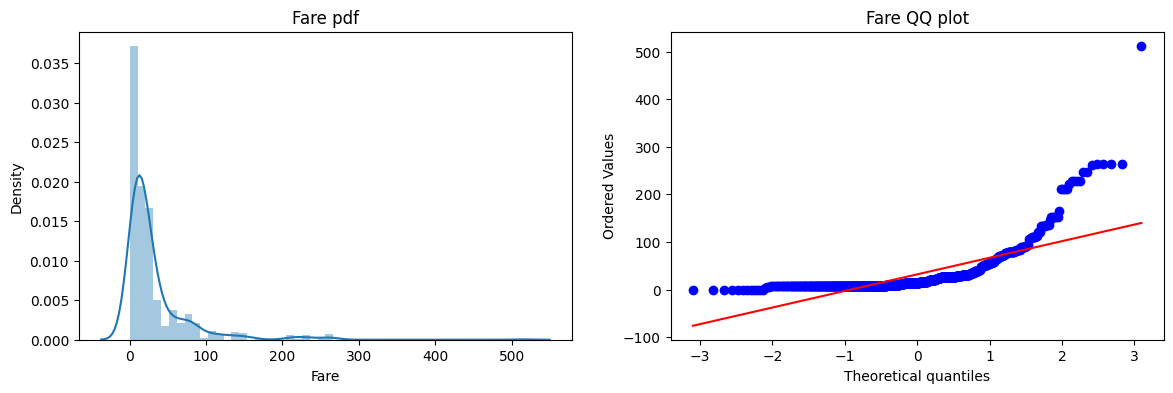

In [17]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Fare'])
plt.title('Fare pdf')

plt.subplot(122)
stats.probplot(X_train['Fare'],dist="norm",plot=plt)
plt.title('Fare QQ plot')

plt.show()

In [18]:
lr = LogisticRegression()
clf = DecisionTreeClassifier()

In [19]:
lr.fit(X_train,y_train)
clf.fit(X_train,y_train)

y_pred= lr.predict(X_test)
y_pred1 = clf.predict(X_test)

print(accuracy_score(y_test,y_pred))
print(accuracy_score(y_test,y_pred1))

0.6033519553072626
0.6312849162011173


In [20]:
trf = FunctionTransformer(func=np.log1p)

X_train_t = trf.fit_transform(X_train)
X_test_t = trf.transform(X_test)

In [22]:
lr = LogisticRegression()
clf = DecisionTreeClassifier()

lr.fit(X_train_t,y_train)
clf.fit(X_train_t,y_train)

y_pred= lr.predict(X_test_t)
y_pred1 = clf.predict(X_test_t)

print(accuracy_score(y_test,y_pred))
print(accuracy_score(y_test,y_pred1))# decision tree doesnt care

0.6368715083798883
0.6256983240223464


In [23]:
X_train_t = trf.fit_transform(x)

lr = LogisticRegression()
clf = DecisionTreeClassifier()

print(np.mean(cross_val_score(lr,X_train_t,y,scoring='accuracy',cv=10)))
print(np.mean(cross_val_score(clf,X_train_t,y,scoring='accuracy',cv=10)))

0.678027465667915
0.6576903870162296


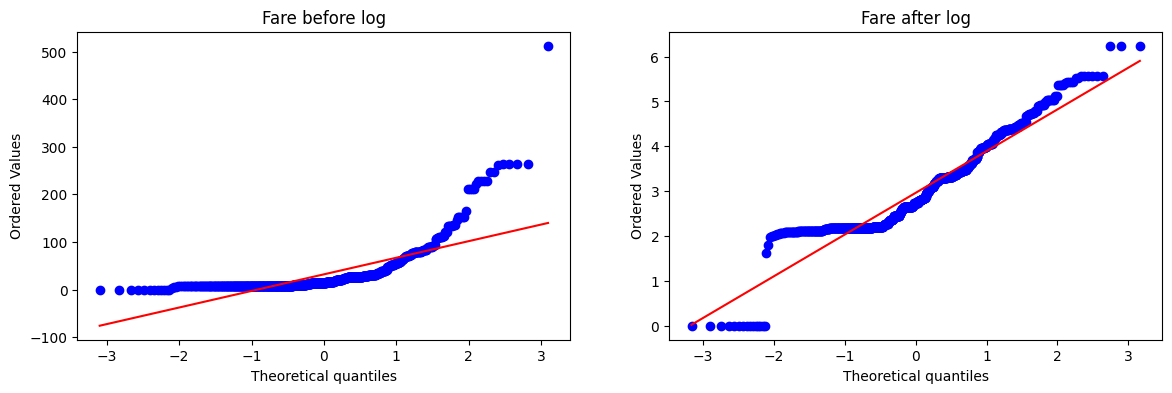

In [24]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(X_train['Fare'],dist="norm",plot=plt)
plt.title('Fare before log')

plt.subplot(122)
stats.probplot(X_train_t['Fare'],dist="norm",plot=plt)
plt.title('Fare after log')

plt.show()

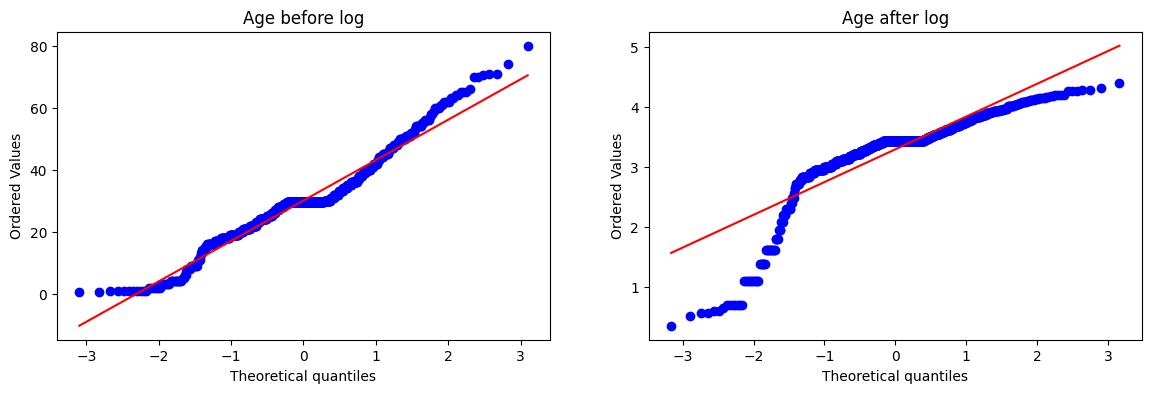

In [25]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(X_train['Age'],dist="norm",plot=plt)
plt.title('Age before log')

plt.subplot(122)
stats.probplot(X_train_t['Age'],dist="norm",plot=plt)
plt.title('Age after log')

plt.show()


In [26]:
trf2 = ColumnTransformer([('log',FunctionTransformer(func=np.log1p),['Fare'])],remainder='passthrough')

X_train_t2 = trf2.fit_transform(X_train)
X_test_t2 = trf2.transform(X_test)

In [30]:
lr1 = LogisticRegression()
clf1 = DecisionTreeClassifier()

lr1.fit(X_train_t2,y_train)
clf1.fit(X_train_t2,y_train)

y_pred= lr1.predict(X_test_t2)
y_pred1 = clf1.predict(X_test_t2)

print(accuracy_score(y_test,y_pred))
print(accuracy_score(y_test,y_pred1))

0.6368715083798883
0.6312849162011173


In [31]:
X_train_t2 = trf2.fit_transform(x)

lr = LogisticRegression()
clf = DecisionTreeClassifier()

print(np.mean(cross_val_score(lr,X_train_t,y,scoring='accuracy',cv=10)))
print(np.mean(cross_val_score(clf,X_train_t,y,scoring='accuracy',cv=10)))

0.678027465667915
0.6599625468164794


funtion tranform functions are 
lambda x:x
lambda x : x**2
lambda x: 1/(x+0.001)